### Customer Churn Prediction: This project is is designed to analyze customer behavior and predict whether a customer is likely to stop using a service or product. Businesses use these models to improve customer retention strategies and reduce churn rates.

First, we will mount the drive on our project as it will help us in acess the dataset to the project.

It has several benefits:
1. It can access large datasets

2. We are on google colab so we are using cloud services and training is done on cloud platform without worrying about local storage limitations.

3. If multiple people are working on your project, a mounted drive ensures data consistency across devices.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####Importing all the libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Loading all the datasets

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telco_churn.csv')

EDA (Exploratory Data Analysis)

This step is necessary for Data Cleaning, Understanding the data Distribution, Feature Engineering and Visualising the Data.

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Checking if there is any missing values or any null values present in the dataset

In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Plot Churn Distribution

This is used to visually explore the distribution of churned vs. non-churned customers in the dataset. This is a key part of exploratory data analysis (EDA).

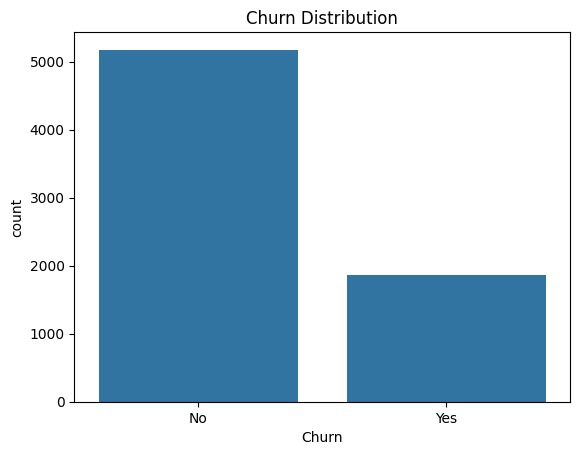

In [ ]:
sns.countplot(data=df,x='Churn')
plt.title('Churn Distribution')
plt.show()

In [ ]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:df[column] = le.fit_transform(df[column].astype(str))

Drop customerID if exists

In [ ]:
df.drop(columns=['customerID'],errors='ignore',inplace=True)

Train-Test Split

We do this as it splits the data into "Training" and "Testing" sets, which is critical for building a reliable machine learning model.

In [ ]:
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In this project, Random Forest is used to train the dataset. As Random Forest is an ensemble learning algorithm that builds multiple decision trees and merges their results to make more accurate and stable predictions. Unlike a single decision tree, it reduces overfitting and improves generalization by averaging predictions from many trees.

It can handle both numerical and categorical features.

Also works well without a ton of parameter tuning

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
[[944  92]
 [192 181]]


In [ ]:
df['Predicted_Churn'] = model.predict(X)


In [ ]:
churned_customers = df[df['Predicted_Churn'] == 1]


In [ ]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Predicted_Churn'],
      dtype='object')


In [ ]:
print(churned_customers[['PhoneService', 'tenure', 'MonthlyCharges','Predicted_Churn','Contract']])


      PhoneService  tenure  MonthlyCharges  Predicted_Churn  Contract
2                1       2           53.85                1         0
4                1       2           70.70                1         0
5                1       8           99.65                1         0
8                1      28          104.80                1         0
13               1      49          103.70                1         0
...            ...     ...             ...              ...       ...
7018             1       1           70.65                1         0
7021             1      12           59.80                1         1
7026             1       9           44.20                1         0
7032             1       1           75.75                1         0
7041             1       4           74.40                1         0

[1770 rows x 5 columns]


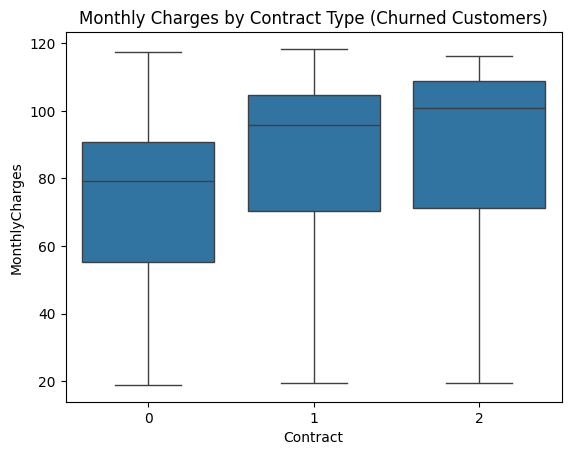

In [ ]:
sns.boxplot(data=churned_customers, x='Contract', y='MonthlyCharges')
plt.title("Monthly Charges by Contract Type (Churned Customers)")
plt.show()


Saving a new file for churned customers

In [ ]:
churned_customers.to_csv("likely_churn_customers.csv", index=False)


## Visualising the Data of the churned customer in the Python itself

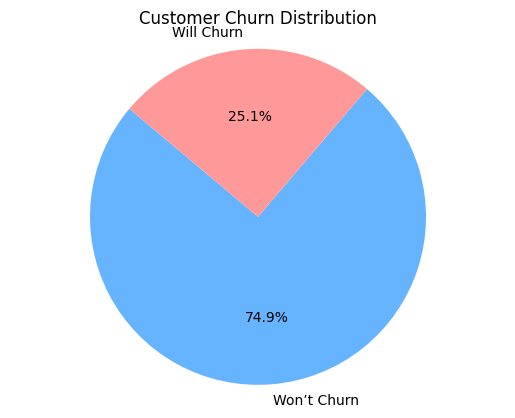

In [ ]:
import matplotlib.pyplot as plt

labels = ['Won’t Churn', 'Will Churn']
sizes = df['Predicted_Churn'].value_counts().sort_index()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()


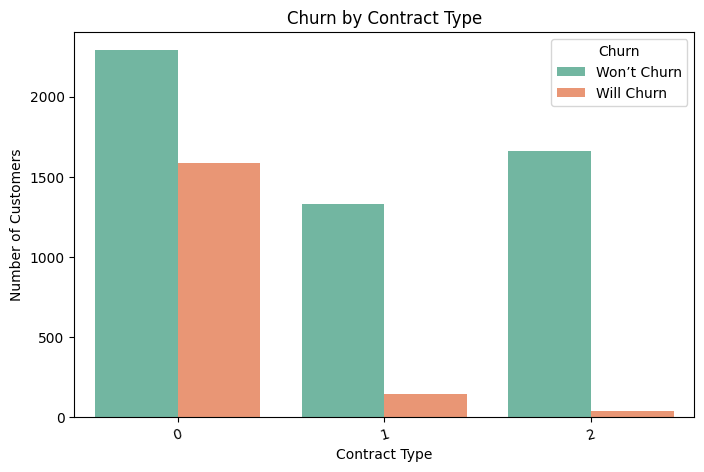

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Predicted_Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Won’t Churn', 'Will Churn'])
plt.xticks(rotation=15)
plt.show()


<ipython-input-28-0edb048dea90>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Predicted_Churn', y='MonthlyCharges', palette='Set3')


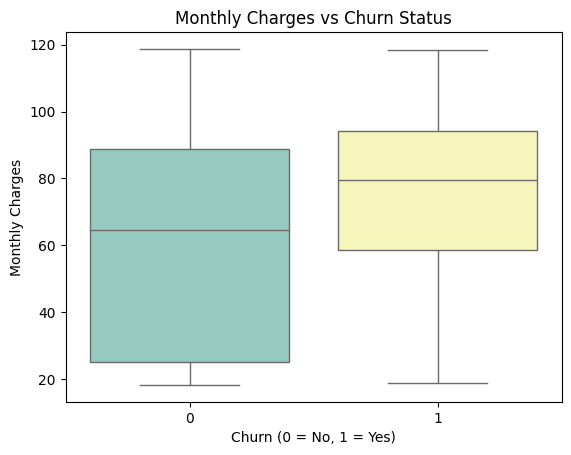

In [ ]:
sns.boxplot(data=df, x='Predicted_Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()


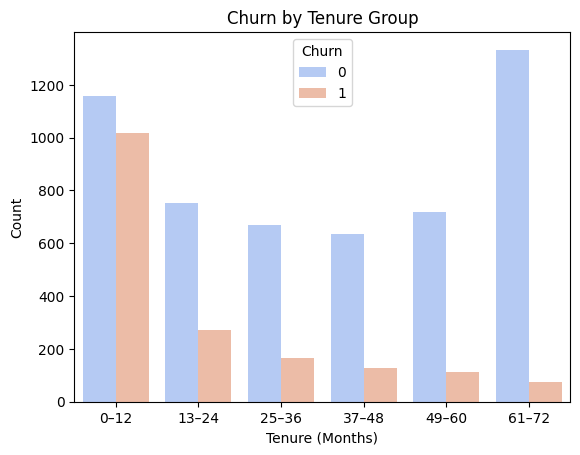

In [ ]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0–12', '13–24', '25–36', '37–48', '49–60', '61–72'])

sns.countplot(data=df, x='tenure_group', hue='Predicted_Churn', palette='coolwarm')
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()
